# Fashion images classification using an artificial neural network
The main idea with this AI is classify different images with its respective class: 
0. 	T-shirt/top
1. 	Trouser
2. 	Pullover
3. 	Dress
4. 	Coat
5. 	Sandal
6. 	Shirt
7. 	Sneaker
8. 	Bag
9. 	Ankle boot
. 
There are 60000 images in training dataset and 10000 testing data set


## Importing libraries and dataset

In [20]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
import tensorflow as tf
import tensorflow.keras as keras

In [22]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

## Normalizing data and training and validating data split

In [23]:
x_train_n = x_train_full / np.max(x_train_full)
x_test_n = x_test / np.max(x_train_full)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_n, y_train_full, 
                                                      test_size = 0.1, random_state = 42)

In [25]:
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(54000, 28, 28) (54000,) (6000, 28, 28) (6000,)


In [26]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat"
               , "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

In [27]:
class_names[y_train[0]] #Indexing with class names list

'Sandal'

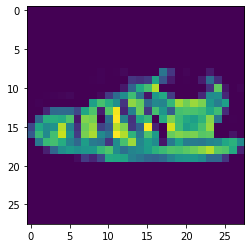

In [28]:
plt.imshow(x_train[0]) #Plotting the respective object

## Reshaping data

In [29]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) #last number is for channels
x_valid = x_valid.reshape((x_valid.shape[0], x_valid.shape[1], x_valid.shape[2], 1))
x_test_n = x_test_n.reshape((x_test_n.shape[0], x_test_n.shape[1], x_test_n.shape[2], 1))

## Creating, compiling and training model
### Structure

![cnn_structure.jpg](cnn_structure.jpg)

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, 
           padding = "valid", activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(300, activation = "relu"),
    Dense(100, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

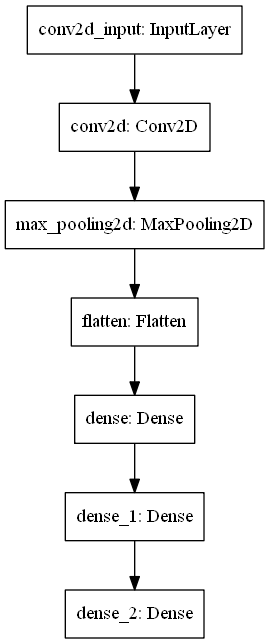

In [32]:
keras.utils.plot_model(model)

In [33]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [34]:
model_history = model.fit(x_train, y_train, epochs = 30, batch_size = 64,
                          validation_data = (x_valid, y_valid))

Epoch 1/30
844/844 [==============================] - 26s 30ms/step - loss: 1.2865 - accuracy: 0.5792 - val_loss: 0.6967 - val_accuracy: 0.7123
Epoch 2/30
844/844 [==============================] - 25s 30ms/step - loss: 0.5631 - accuracy: 0.7989 - val_loss: 0.5425 - val_accuracy: 0.8033
Epoch 3/30
844/844 [==============================] - 25s 30ms/step - loss: 0.4929 - accuracy: 0.8225 - val_loss: 0.4606 - val_accuracy: 0.8352
Epoch 4/30
844/844 [==============================] - 28s 34ms/step - loss: 0.4437 - accuracy: 0.8424 - val_loss: 0.4306 - val_accuracy: 0.8507
Epoch 5/30
844/844 [==============================] - 27s 32ms/step - loss: 0.4238 - accuracy: 0.8465 - val_loss: 0.4461 - val_accuracy: 0.8398
Epoch 6/30
844/844 [==============================] - 27s 32ms/step - loss: 0.4078 - accuracy: 0.8550 - val_loss: 0.3986 - val_accuracy: 0.8568
Epoch 7/30
844/844 [==============================] - 27s 33ms/step - loss: 0.3831 - accuracy: 0.8618 - val_loss: 0.3882 - val_accuracy:

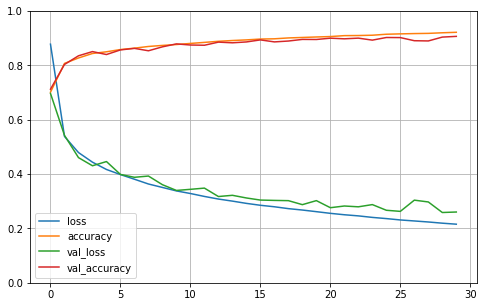

In [35]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
score = model.evaluate(x_test_n, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2767 - accuracy: 0.8991


In [46]:
y_pred = model.predict_classes(x_test_n)

C:\Users\Rolando\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


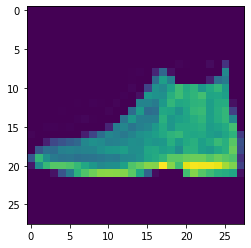

In [47]:
plt.imshow(x_test[0])

In [48]:
class_names[y_pred[0]]

'Ankle boot'

In [49]:
del model
keras.backend.clear_session()

In this practice, it is not necessary do callbacks or any hyperparameter tuning, but, I can get an accuracy near of 90%

## Pooling vs no pooling

In [54]:
np.random.seed(42)
tf.random.set_seed(42)
model_a = keras.models.Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), strides = 1,
          padding = "valid", activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(300, activation = "relu"),
    Dense(300, activation = "relu"),
    Dense(10, activation = "softmax")
])#Pooling

model_b = keras.models.Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), strides = 1,
          padding = "valid", activation = "relu", input_shape = (28, 28, 1)),
    Flatten(),
    Dense(300, activation = "relu"),
    Dense(300, activation = "relu"),
    Dense(10, activation = "softmax")
])#No pooling

In [55]:
model_a.compile(loss = "sparse_categorical_crossentropy",
               optimizer = "sgd",
               metrics = ["accuracy"])

model_b.compile(loss = "sparse_categorical_crossentropy",
               optimizer = "sgd",
               metrics = ["accuracy"])

In [56]:
model_a.fit(x_train, y_train, epochs = 3, batch_size = 64, validation_data = (x_valid, y_valid))

Epoch 1/3
844/844 [==============================] - 29s 34ms/step - loss: 1.3118 - accuracy: 0.5936 - val_loss: 0.6784 - val_accuracy: 0.7297
Epoch 2/3
844/844 [==============================] - 28s 33ms/step - loss: 0.5693 - accuracy: 0.7957 - val_loss: 0.5487 - val_accuracy: 0.7985
Epoch 3/3
844/844 [==============================] - 28s 33ms/step - loss: 0.4957 - accuracy: 0.8206 - val_loss: 0.4674 - val_accuracy: 0.8322


In [57]:
model_b.fit(x_train, y_train, epochs = 3, batch_size = 64, validation_data = (x_valid, y_valid))

Epoch 1/3
844/844 [==============================] - 58s 68ms/step - loss: 1.0558 - accuracy: 0.6536 - val_loss: 0.6490 - val_accuracy: 0.7367
Epoch 2/3
844/844 [==============================] - 59s 70ms/step - loss: 0.5149 - accuracy: 0.8163 - val_loss: 0.5135 - val_accuracy: 0.8117
Epoch 3/3
844/844 [==============================] - 62s 73ms/step - loss: 0.4549 - accuracy: 0.8357 - val_loss: 0.4355 - val_accuracy: 0.8427


The main difference between model is no-pooling model took more time than pooling model, the ecplanation is in no-pooling model needs calculate more parameters than pooling model, you can see it in the next summaries.

In [58]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 1,716,330
Trainable params: 1,716,330
Non-trainable params: 0
______________________________________________

In [59]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 6,583,530
Trainable params: 6,583,530
Non-trainable params: 0
_________________________________________________________________


In [60]:
del model_a
del model_b
keras.backend.clear_session()